In [1]:
import os
import sys
import chess.pgn as pychess
from chess.pgn import read_game
from chess import square_name
from chess import SQUARE_NAMES, BB_SQUARES
import ChessFuncs
from ChessFuncs import end_board
import bz2
import time
from io import StringIO
from multiprocessing import Process
import time
from time import sleep
import time
import glob

In [65]:
paths = [glob.glob('*lichess*')[1]]

In [3]:
def end_board(parsed_pgn_file):
    '''Moves the py-chess board obj to the final move.'''
    current_board = parsed_pgn_file.board()
    for move in parsed_pgn_file.main_line():
        current_board.push(move)    
    return current_board

In [ ]:
%%time
[a,b,c,d,e,f,g,h] = [0]*8
[r1,r2,r3,r4,r5,r6,r7,r8] = [0]*8

with open(path,'r') as pgns:
    count = 0
    for line in pgns:

        if line[:7] == '[Result':
            result = line.split('"')[1]
        if line.startswith("1. "):
            count += 1
            pgn = StringIO(line)
            pgn = read_game(pgn)
            board = end_board(pgn)

            if result in ["1-0","0-1"] and board.is_checkmate():
                
                winner,loser = result.split('-')
                king_num = board.king(int(loser))
                king_sq = square_name(king_num)
                    
                if king_sq[0] == 'a':
                    a += 1
                if king_sq[0] == 'b':
                    b += 1
                if king_sq[0] == 'c':
                    c += 1
                if king_sq[0] == 'd':
                    d += 1
                if king_sq[0] == 'e':
                    e += 1
                if king_sq[0] == 'f':
                    f += 1
                if king_sq[0] == 'g':
                    g += 1
                if king_sq[0] == 'h':
                    h += 1

                if king_sq[1] == '1':
                    r1 += 1
                if king_sq[1] == '2':
                    r2 += 1
                if king_sq[1] == '3':
                    r3 += 1
                if king_sq[1] == '4':
                    r4 += 1
                if king_sq[1] == '5':
                    r5 += 1
                if king_sq[1] == '6':
                    r6 += 1
                if king_sq[1] == '7':
                    r7 += 1
                if king_sq[1] == '8':
                    r8 += 1
                    
    print(f"Parsed {round(count/100,1) } hundred games")


In [ ]:
%%time
[a,b,c,d,e,f,g,h] = [0]*8
[r1,r2,r3,r4,r5,r6,r7,r8] = [0]*8

with open(parsedpath,'r') as pgn:
    count = 0
    for line in pgn:
        result, king, queen = line.split(',')
        if int(result) == 0 or int(result) == 1:
            king_sq = square_name(int(king))
            
            if king_sq[0] == 'a':
                a += 1
            if king_sq[0] == 'b':
                b += 1
            if king_sq[0] == 'c':
                c += 1
            if king_sq[0] == 'd':
                d += 1
            if king_sq[0] == 'e':
                e += 1
            if king_sq[0] == 'f':
                f += 1
            if king_sq[0] == 'g':
                g += 1
            if king_sq[0] == 'h':
                h += 1
                
            if king_sq[1] == '1':
                r1 += 1
            if king_sq[1] == '2':
                r2 += 1
            if king_sq[1] == '3':
                r3 += 1
            if king_sq[1] == '4':
                r4 += 1
            if king_sq[1] == '5':
                r5 += 1
            if king_sq[1] == '6':
                r6 += 1
            if king_sq[1] == '7':
                r7 += 1
            if king_sq[1] == '8':
                r8 += 1
                
        count += 1
    print(f"Parsed {round(count/1000000,1) } million games")


In [ ]:
count = 0
then = time.time()

with open(path,'r') as pgn:
    lines = pgn.readlines(10000000)
    for line in lines:
        if line[:7] == '[Result':
            result = line.split('"')[1]
        if line[:2] == '1.':
            count += 1
            if result == '1-0' or result == '0-1':
                pgn = StringIO(line)                
#                 pgn = read_game(pgn) # slow function
#                 board = end_board(pgn) # slow function
    
    elapsed = time.time() - then
    print(f"Took {round(elapsed,2)} seconds")
    print(f"Parsed {round(count,1) } games")
    print(f"Will take {round(((elapsed * (400000000/count))/60/60/24),2)} days to parse all")

# Pandas create pivot

In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [87]:
#create a DataFrame with the index set to chess square names, and an empty count column
checkmate = pd.DataFrame(SQUARE_NAMES,columns=['square_name'])
checkmate.index = df['square_name']
checkmate['count'] = 0

stalemate = pd.DataFrame(SQUARE_NAMES,columns=['square_name'])
stalemate.index = df['square_name']
stalemate['count'] = 0

In [88]:
#function to match the output of square_name() func to the index of new data frame
#adds 1 to the count column
def adder(dataframe, sq):
    dataframe.at[sq,'count'] += 1

In [92]:
%%time
#do this for each parsed pgn file
for path in paths:
    with open(path,'r') as file: 
        for line in file:
            result,king,queen = line.split(',')
            
            if result == '1' or result == '0': #if checkmate
                king = square_name(int(king))
                adder(checkmate,king)
                
            else: #if stalemate
                king_white,king_black = [square_name(int(king)) for king in king.split('-')]
#                 adder(stalemate,king_white)
                adder(stalemate,king_black)
        

CPU times: user 12.8 s, sys: 59.7 ms, total: 12.9 s
Wall time: 13 s


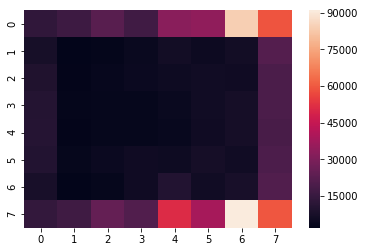

In [94]:
#move the count col into an np.array, then reshape 8x8 to match a chessboard
checkmate_counts = np.array(df['count'])
checkmate_counts = king_counts.reshape(8,8)

#create heatmap
sns.heatmap(checkmate_counts)

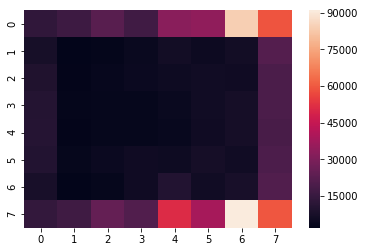

In [95]:
#move the count col into an np.array, then reshape 8x8 to match a chessboard
stalemate_counts = np.array(df['count'])
stalemate_counts = king_counts.reshape(8,8)

#create heatmap
sns.heatmap(stalemate_counts)